In [829]:
import numpy as np
from numpy import array
import pandas as pd
from datetime import datetime,timedelta,date

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import csv
import os
import quandl as q
import time

In [830]:
#Quandl Lib
auth_tok = "eEnUAGHonopJ5XRR8hnv"
data1 = q.get("NSE/HDFC", trim_start = "2018-1-1", trim_end = "2021-1-8", authtoken=auth_tok)

#it returns data till 01 Apr 2019 :-(
#print(data)

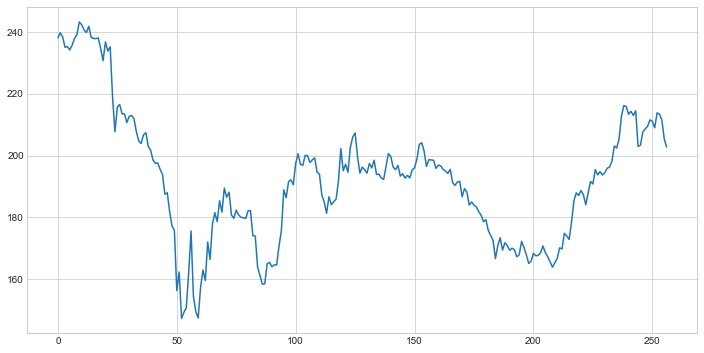

In [831]:
#load data - user can download the historical records from BSE website and set the path below to local folder 

#below data is old date to new date
TATA_BSL = 'D:/NLP Course/SMA/Tata Steel - 2 Yr Data.csv'
VST_IND  = 'D:/NLP Course/SMA/30-12-2019-TO-02-12-2020VSTINDALLN.csv'

#below data is latest date to old date hence needs a order reversal 
NESTLE   = "D:/NLP Course/SMA/NESTLE Dec 2015-2020.csv"
TITAN    = "D:/NLP Course/SMA/TITAN - 1Yr.csv"
ITC      = "D:/NLP Course/SMA/ITC - 1Yr.csv"
BATA      = "D:/NLP Course/SMA/BATA - 1Yr.csv"
ASIAN_PAINT   = "D:/NLP Course/SMA/Asian Paints - 3Yrs.csv"
    
#Reverse the rows of csv file and save as out.csv    
with open(ITC) as fr, open("out.csv","w",newline="") as fw:
    cr = csv.reader(fr,delimiter=";")
    cw = csv.writer(fw,delimiter=";")
    cw.writerow(next(cr))  # write title as-is
    cw.writerows(reversed(list(cr)))
    
data = pd.read_csv("out.csv")

# Plot the price of the asset over time
plt.figure(figsize=(12,6))
plt.plot(data['Close Price'])

In [832]:
# Simple Moving Average 
SMA30 = pd.DataFrame()
SMA30['Close Price'] = data['Close Price'].rolling(window=30).mean() 

# Simple Moving Average 
SMA90 = pd.DataFrame()
SMA90['Close Price'] = data['Close Price'].rolling(window=90).mean() 

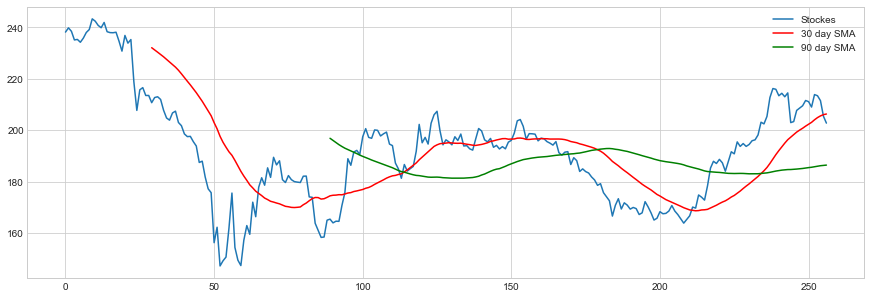

In [833]:
# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(15,5))
plt.plot(data['Close Price'], label='Stockes')
plt.plot(SMA30['Close Price'],'r', label='30 day SMA')
plt.plot(SMA90['Close Price'],'g', label='90 day SMA')
plt.legend(loc='bottom right')
plt.grid(True)
plt.show()

In [834]:
def momentum_strategy(data):
    buy_price = []
    sell_price = []
    flag = -1 
        
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA90'][i]:        
            if flag != 1:
                    buy_price.append(np.nan)
                    sell_price.append(data['Stock'][i]) 
                    flag = 1 
                    print("Sell Price: ",data['Stock'][i])
                    print("Sell Date: ",data['Date'][i])                    
            else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)                      
        elif data['SMA30'][i] < data['SMA90'][i]:        
            if flag != 0:
                    buy_price.append(data['Stock'][i])
                    sell_price.append(np.nan) 
                    flag = 0
                    print("\nBuy Price: ",data['Stock'][i])
                    print("Buy Date: ",data['Date'][i])
            else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)                    
        else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                         
    return(buy_price,sell_price)

In [835]:
new_data = pd.DataFrame()

new_data['Date']  = data['Date'] #pd.to_datetime(data.Date)
new_data['Stock'] = data['Close Price']
new_data['SMA30'] = SMA30['Close Price']
new_data['SMA90'] = SMA90['Close Price']

trade = momentum_strategy(new_data)

new_data['Buy_Price']  = trade[0]
new_data['Sell_Price'] = trade[1]


Buy Price:  165.4
Buy Date:  13-May-20
Sell Price:  186.65
Sell Date:  18-Jun-20

Buy Price:  178.55
Buy Date:  17-Sep-20
Sell Price:  202.45
Sell Date:  8-Dec-20


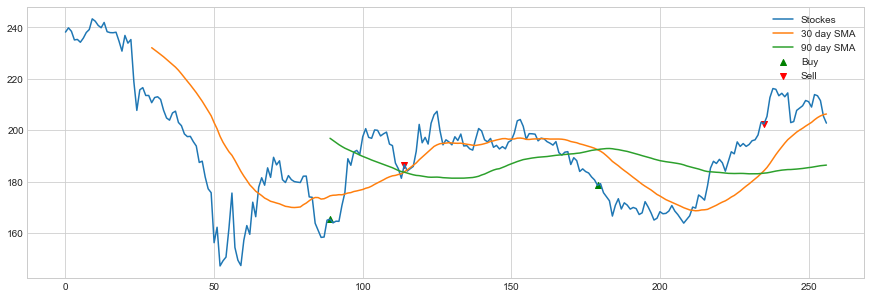

In [836]:
#new_data = new_data.iloc[::-1]

# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(15,5))
plt.plot(new_data['Stock'], label='Stockes')
plt.plot(new_data['SMA30'], label='30 day SMA')
plt.plot(new_data['SMA90'], label='90 day SMA')

plt.scatter(new_data.index,new_data['Buy_Price'], label = 'Buy', marker = '^',color = 'green')
plt.scatter(new_data.index,new_data['Sell_Price'],label = 'Sell',marker = 'v',color = 'red')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()